# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [119]:
import pandas as pd

In [120]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [148]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

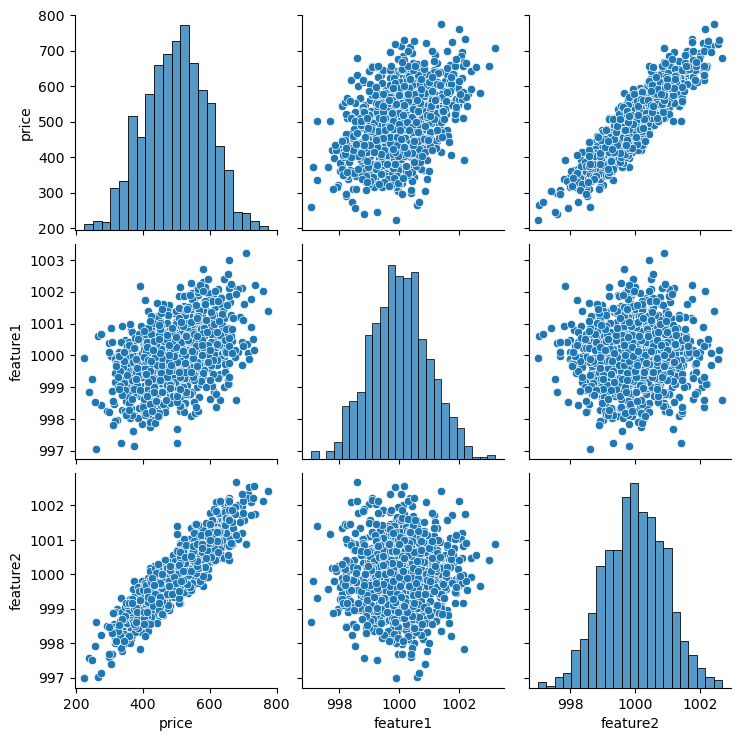

In [123]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [126]:
X_train.shape

(700, 2)

In [127]:
X_test.shape

(300, 2)

In [128]:
y_train.shape

(700,)

In [129]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
# help(MinMaxScaler)

In [132]:
scaler = MinMaxScaler()

In [133]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [134]:
scaler.fit(X_train)

MinMaxScaler()

In [135]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [136]:
import tensorflow as tf

In [137]:
from tensorflow.keras.models import Sequential

In [138]:
# help(Sequential)

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

Đây là cách tạo một mô hình Sequential trong Keras. Mô hình này sẽ chứa các lớp mạng neural được xếp chồng lên nhau một cách tuần tự.

Đoạn này import các lớp Dense và Activation từ tensorflow.keras.layers.

Lớp Dense là một lớp kết nối đầy đủ trong mạng neural, trong đó mỗi đơn vị neuron kết nối với tất cả các đơn vị ở lớp trước và sau.

Lớp Activation thường được sử dụng để thêm hàm kích hoạt vào đầu ra của các lớp trong mạng neural, ví dụ như hàm sigmoid, tanh, relu, softmax...

### Model - as a list of layers

In [140]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])


Trong trường hợp này, ba lớp Dense được thêm vào mô hình.

Tham số units là số lượng đơn vị neuron trong lớp. Ở đây, ta có 2 đơn vị cho mỗi lớp Dense.

Cả ba lớp Dense này đều nối tiếp nhau trong mô hình, tạo thành một kiến trúc mạng neural tuần tự. Cụ thể, bạn có một lớp có 2 đơn vị neuron, sau đó là một lớp khác cũng có 2 đơn vị neuron, và cuối cùng là một lớp nữa có 2 đơn vị neuron. Điều này chỉ ra rằng mỗi lớp sẽ có đầu vào là đầu ra của lớp trước đó và đầu ra của lớp cuối cùng sẽ là đầu ra của mô hình.






### Model - adding in layers one by one

In [141]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [142]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

Đoạn mã này xây dựng một mô hình mạng neural sử dụng lớp Sequential và thêm các lớp Dense vào mô hình.


1. model = Sequential(): Tạo một đối tượng mô hình tuần tự.


2. model.add(Dense(4, activation='relu')): Thêm lớp Dense vào mô hình với 4 đơn vị neuron và hàm kích hoạt là ReLU (Rectified Linear Activation). ReLU là một hàm kích hoạt thường được sử dụng trong các lớp ẩn của mạng neural.


3. Mã tương tự được lặp lại hai lần nữa, thêm vào mô hình hai lớp Dense khác nhau, cả hai đều có 4 đơn vị neuron và hàm kích hoạt ReLU.


4. model.add(Dense(1)): Thêm lớp cuối cùng vào mô hình với 1 đơn vị neuron. Đây thường là lớp đầu ra của mô hình.


5. model.compile(optimizer='rmsprop', loss='mse'): Khi mô hình đã được thiết kế, câu lệnh này biên dịch mô hình. optimizer là thuật toán tối ưu hóa, ở đây sử dụng RMSprop. loss là hàm mất mát, ở đây là hàm bình phương sai (mean squared error - MSE).


6. Mã này xây dựng một mô hình có 3 lớp ẩn với hàm kích hoạt ReLU và một lớp đầu ra với hàm kích hoạt tuyến tính. Mô hình được tối ưu hóa bằng RMSprop và sử dụng hàm mất mát MSE cho quá trình huấn luyện.






### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [143]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 4ms/step - loss: 256664.8906
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256591.8906
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256520.5469
Epoch 4/250
22/22 [==============================] - 0s 4ms/step - loss: 256444.2031
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 256362.4688
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 256274.5781
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 256180.2344
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 256079.1094
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 255970.7188
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 255854.1250
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 255729.6875
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

22/22 [==============================] - 0s 3ms/step - loss: 614.5735
Epoch 193/250
22/22 [==============================] - 0s 3ms/step - loss: 600.2168
Epoch 194/250
22/22 [==============================] - 0s 3ms/step - loss: 585.2646
Epoch 195/250
22/22 [==============================] - 0s 3ms/step - loss: 571.7750
Epoch 196/250
22/22 [==============================] - 0s 3ms/step - loss: 558.6097
Epoch 197/250
22/22 [==============================] - 0s 3ms/step - loss: 544.4328
Epoch 198/250
22/22 [==============================] - 0s 3ms/step - loss: 530.3017
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 516.7697
Epoch 200/250
22/22 [==============================] - 0s 3ms/step - loss: 505.1827
Epoch 201/250
22/22 [==============================] - 0s 3ms/step - loss: 493.2109
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 480.1141
Epoch 203/250
22/22 [==============================] - 0s 3ms/step - loss: 469.0600
Epoch 

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [144]:
model.history.history

{'loss': [256664.890625,
  256591.890625,
  256520.546875,
  256444.203125,
  256362.46875,
  256274.578125,
  256180.234375,
  256079.109375,
  255970.71875,
  255854.125,
  255729.6875,
  255595.796875,
  255451.0625,
  255293.515625,
  255122.3125,
  254934.515625,
  254731.609375,
  254512.78125,
  254279.0625,
  254026.78125,
  253757.6875,
  253468.828125,
  253160.5,
  252832.359375,
  252484.0,
  252112.796875,
  251716.09375,
  251295.078125,
  250848.59375,
  250374.765625,
  249871.171875,
  249329.515625,
  248744.78125,
  248111.546875,
  247434.46875,
  246719.859375,
  245964.4375,
  245163.015625,
  244316.953125,
  243420.578125,
  242480.609375,
  241484.5,
  240443.6875,
  239347.5625,
  238194.421875,
  236986.8125,
  235718.671875,
  234391.5625,
  233006.75,
  231564.890625,
  230049.640625,
  228474.703125,
  226833.765625,
  225119.765625,
  223347.21875,
  221490.171875,
  219559.65625,
  217561.625,
  215497.34375,
  213343.90625,
  211123.3125,
  208823.07812

In [145]:
loss = model.history.history['loss']

model.history: Trong quá trình huấn luyện, Keras tự động theo dõi các chỉ số, bao gồm cả hàm mất mát, và lưu chúng trong thuộc tính history của mô hình.

.history['loss']: Trong lịch sử của mô hình, bạn có thể truy cập vào giá trị của hàm mất mát bằng cách sử dụng cú pháp này. 'loss' là tên của chỉ số hàm mất mát trong lịch sử.

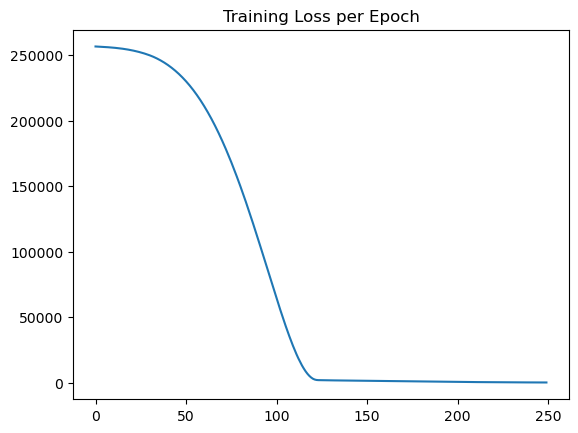

In [146]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [30]:
model.metrics_names

['loss']

In [32]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [33]:
training_score

25.36686134338379

In [34]:
test_score

26.44215965270996

### Further Evaluations

In [65]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [66]:
test_predictions

array([[406.32437],
       [622.19403],
       [590.8568 ],
       [572.061  ],
       [369.26056],
       [578.4947 ],
       [516.04474],
       [459.08936],
       [549.30927],
       [447.53387],
       [610.53925],
       [547.2373 ],
       [420.07407],
       [410.14282],
       [648.35706],
       [437.65076],
       [507.3796 ],
       [659.2042 ],
       [661.2478 ],
       [564.3519 ],
       [336.64737],
       [445.51086],
       [384.25928],
       [380.02618],
       [565.95435],
       [610.01013],
       [532.2159 ],
       [428.53714],
       [654.454  ],
       [414.55533],
       [442.80655],
       [485.28772],
       [438.99924],
       [680.4061 ],
       [424.80554],
       [419.08804],
       [500.63998],
       [549.82935],
       [510.54456],
       [397.62833],
       [617.039  ],
       [417.19327],
       [603.0953 ],
       [445.7108 ],
       [501.99194],
       [579.535  ],
       [666.20636],
       [490.04733],
       [320.02112],
       [485.70172],


In [67]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [68]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [69]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [70]:
test_predictions

0      406.324371
1      622.194031
2      590.856812
3      572.060974
4      369.260559
          ...    
295    529.259827
296    517.104675
297    608.322937
298    417.304291
299    412.304321
Length: 300, dtype: float32

In [71]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [72]:
pred_df.columns = ['Test Y','Model Predictions']

In [73]:
pred_df

,Test Y,Model Predictions
0,402.296319,406.324371
1,624.156198,622.194031
2,582.455066,590.856812
3,578.588606,572.060974
4,371.224104,369.260559
...,...,...
295,525.704657,529.259827
296,502.909473,517.104675
297,612.727910,608.322937
298,417.569725,417.304291


Let's compare to the real test labels!

<Axes: xlabel='Test Y', ylabel='Model Predictions'>

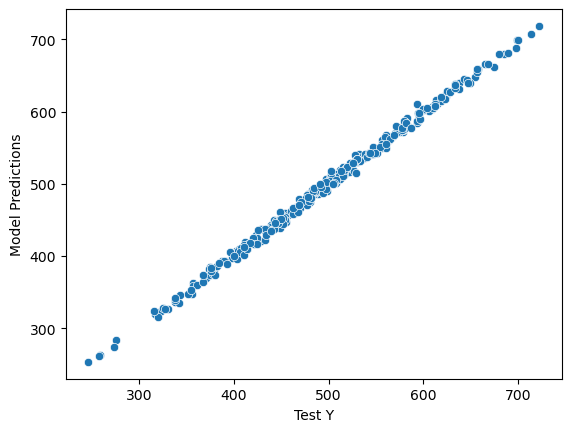

In [74]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [75]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5524\1356567216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50)


<Axes: xlabel='Error', ylabel='Density'>

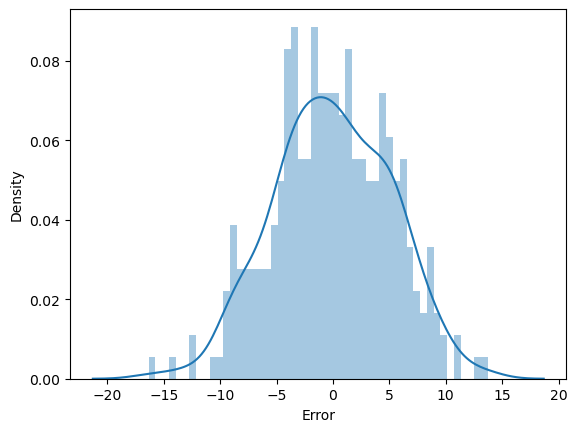

In [78]:
sns.distplot(pred_df['Error'],bins=50)

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [81]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.175684139683873

In [82]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

26.442164209969306

In [83]:
# Essentially the same thing, difference just due to precision
test_score

26.44215965270996

In [84]:
#RMSE
test_score**0.5

5.142194050472032

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [96]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [97]:
# Don't forget to scale!
scaler.transform(new_gem)
#scaler để chuẩn hoá dự liệu trước đó
#transform thực hiện quá trình chuẩn hoá dự liệu mới

array([[0.14117652, 0.53968792]])

In [98]:
new_gem = scaler.transform(new_gem)

In [99]:
model.predict(new_gem)

1/1 [==============================] - 0s 39ms/step


array([[421.66797]], dtype=float32)

## Saving and Loading a Model

In [100]:
from tensorflow.keras.models import load_model

In [101]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
later_model = load_model('my_model.h5')

In [103]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 130ms/step


array([[421.66797]], dtype=float32)